In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("/content/2.Coal.csv")
data.columns = ['Pressure', 'ER', 'MC', 'Temperature', 'H2',
       'LHV', 'η', 'λ']
data.head()

,Pressure,ER,MC,Temperature,H2,LHV,η,λ
0,100.0,0.3,0.1000,700.0,5.905,162.1,94.98,0.1061
1,100.1,0.3,0.1000,700.0,5.910,162.1,94.98,0.1064
2,100.2,0.3,0.1000,700.1,5.914,162.1,94.98,0.1067
3,100.3,0.3,0.1001,700.1,5.919,162.1,94.98,0.1070
4,100.4,0.3,0.1001,700.1,5.924,162.1,94.98,0.1073


In [3]:
#split data to test and train 
predictors = data.columns[0:4]
targets = data.columns[4:8]
data_x = data[predictors]
data_y = data[targets]

train_x , test_x ,train_y, test_y = train_test_split(data_x , data_y , test_size = 0.3 , random_state=1)

In [4]:
print(train_x.shape
,test_x.shape 
,train_y.shape
,test_y.shape)

(7000, 4) (3000, 4) (7000, 4) (3000, 4)


In [5]:
train_x

,Pressure,ER,MC,Temperature
2228,300.5,0.3223,0.1446,766.8
5910,632.0,0.3591,0.2182,877.3
1950,275.5,0.3195,0.1390,758.5
2119,290.7,0.3212,0.1424,763.6
5947,635.3,0.3595,0.2190,878.4
...,...,...,...,...
2895,360.6,0.3290,0.1579,786.9
7813,803.2,0.3781,0.2563,934.4
905,181.5,0.3091,0.1181,727.2
5192,567.3,0.3519,0.2039,855.8


In [6]:
#evaluation functions 
#MAE
def mae(t,p):
  return abs(np.mean(t-p))
#RMSE
def rmse(t,p):
  return np.sqrt(np.sum((p - t)**2)/len(test_y))
#MAPE
def mape(t,p):
  return (np.sum(abs((t-p)/t)))/len(test_y)

In [7]:
#metric data frame to evaluate and compare mlp with tuned mlp 
metric_df = pd.DataFrame(index = ['RMSE','MAE','MAPE'] ,
                         columns = ['MLP' , 'MLP_Tuned'])
metric_df

,MLP,MLP_Tuned
RMSE,NaN,NaN
MAE,NaN,NaN
MAPE,NaN,NaN


In [8]:
#first mlp model 
model_mlp = MLPRegressor(hidden_layer_sizes=2,max_iter=1000)
model_mlp.fit(train_x, train_y)
y_pred_mlp = model_mlp.predict(test_x)
model_mlp.score(test_x , test_y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.17716369785897548

In [9]:
#Evaluation dataframe 
metric_df.at['RMSE','MLP'] = rmse(np.array(test_y) ,y_pred_mlp )
metric_df.at['MAE','MLP'] = mae(np.array(test_y),y_pred_mlp )
metric_df.at['MAPE','MLP'] = mape(np.array(test_y),y_pred_mlp )
metric_df

,MLP,MLP_Tuned
RMSE,6.331031,NaN
MAE,0.10855,NaN
MAPE,1.552378,NaN


In [10]:
#first tuned model
model_mlp= MLPRegressor(hidden_layer_sizes=(12), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = True, alpha = 0.005,random_state=9)
model_mlp.fit(train_x , train_y)
result1 = pd.DataFrame(model_mlp.predict(test_x))

In [11]:
model_mlp.score(test_x , test_y)

0.9947905586416511

In [12]:
metric_df.at['RMSE','MLP_Tuned'] = rmse(np.array(test_y),np.array(result1) )
metric_df.at['MAE','MLP_Tuned'] = mae(np.array(test_y),np.array(result1) )
metric_df.at['MAPE','MLP_Tuned'] = mape(np.array(test_y),np.array(result1) )
metric_df

,MLP,MLP_Tuned
RMSE,6.331031,0.635892
MAE,0.10855,0.000898
MAPE,1.552378,0.115406


In [13]:
result1 = pd.concat([test_y , result1] ,axis=1, join='inner')
result1
metric1 = pd.DataFrame(columns  = targets)
for i in range(0,4) :
  metric1.iloc[:,i] = abs(result1.iloc[:,i+4] - result1.iloc[:,i])
metric1

,H2,LHV,η,λ
2041,4.603575,11.511689,0.636687,1.234890
1989,4.047704,11.418019,0.236518,1.632948
1933,4.573627,20.795621,2.332274,4.183064
2418,2.369788,5.757708,0.358567,0.540599
1217,4.415772,12.172761,0.321520,1.654963
...,...,...,...,...
454,9.906419,48.792245,6.475459,9.947863
1714,4.994747,16.820015,0.634838,2.812176
2570,2.941452,11.661622,0.916801,2.206073
761,1.251462,3.364434,0.110955,0.406666


In [14]:
(metric1 >= 0.4).sum()

H2     883
LHV    898
η      659
λ      823
dtype: int64

In [15]:
#second tuned model
model_mlp2= MLPRegressor(hidden_layer_sizes=(15), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='adaptive',
                               learning_rate_init= 0.005, shuffle = False, alpha = 0.0000005,random_state=2)
model_mlp2.fit(train_x , train_y)
result2 = pd.DataFrame(model_mlp2.predict(test_x) , index = test_x.index , columns = ['H2_p', 'LHV_p', 'η_p', 'λ_p'])

In [16]:
model_mlp2.score(test_x , test_y)

0.9948338091156075

In [17]:
metric_df.at['RMSE','MLP_Tuned2'] = rmse(np.array(test_y),np.array(result2) )
metric_df.at['MAE','MLP_Tuned2'] = mae(np.array(test_y),np.array(result2) )
metric_df.at['MAPE','MLP_Tuned2'] = mape(np.array(test_y),np.array(result2) )
metric_df

,MLP,MLP_Tuned,MLP_Tuned2
RMSE,6.331031,0.635892,0.634360
MAE,0.10855,0.000898,0.001044
MAPE,1.552378,0.115406,0.098520


In [18]:
result2 = pd.concat([test_y , result2] ,axis=1, join='inner')
result2
metric2 = pd.DataFrame(columns  = targets)
for i in range(0,4) :
  metric2.iloc[:,i] = abs(result2.iloc[:,i+4] - result2.iloc[:,i])
metric2

,H2,LHV,η,λ
9953,0.442617,0.796923,0.237037,0.163110
3850,0.763565,0.979159,0.378847,0.038667
4962,0.047177,0.026381,0.074623,0.014278
3886,0.718134,1.027588,0.354712,0.040360
5437,0.209608,0.286009,0.167144,0.013779
...,...,...,...,...
5273,0.159270,0.159357,0.144133,0.003863
8014,0.118867,0.255977,0.048165,0.059860
8984,0.131875,0.170473,0.084436,0.024125
6498,0.315913,0.506115,0.184009,0.071377


In [19]:
(metric2 >= 0.4).sum()

H2      731
LHV    1497
η       115
λ         0
dtype: int64

In [20]:
#third tuned model
model_mlp3= MLPRegressor(hidden_layer_sizes=(10,10), max_iter=2000,
                               activation='relu',solver='adam', learning_rate='adaptive',
                               learning_rate_init= 0.001, shuffle = True, alpha = 0.0000005,random_state=2)
model_mlp3.fit(train_x , train_y)
result3 = pd.DataFrame(model_mlp3.predict(test_x) , index = test_x.index , columns = ['H2_p', 'LHV_p', 'η_p', 'λ_p'])

In [21]:
model_mlp3.score(test_x , test_y)

0.9946644263325392

In [22]:
metric_df.at['RMSE','MLP_Tuned3'] = rmse(np.array(test_y),np.array(result3) )
metric_df.at['MAE','MLP_Tuned3'] = mae(np.array(test_y),np.array(result3) )
metric_df.at['MAPE','MLP_Tuned3'] = mape(np.array(test_y),np.array(result3) )
metric_df

,MLP,MLP_Tuned,MLP_Tuned2,MLP_Tuned3
RMSE,6.331031,0.635892,0.634360,0.630952
MAE,0.10855,0.000898,0.001044,0.008137
MAPE,1.552378,0.115406,0.098520,0.136965


In [23]:
result3 = pd.concat([test_y , result3] ,axis=1, join='inner')
result3
metric3 = pd.DataFrame(columns  = targets)
for i in range(0,4) :
  metric3.iloc[:,i] = abs(result3.iloc[:,i+4] - result3.iloc[:,i])
metric3

,H2,LHV,η,λ
9953,0.464435,0.828634,0.229890,0.201103
3850,0.788565,0.955762,0.433999,0.003514
4962,0.022734,0.039779,0.030754,0.007535
3886,0.743107,1.004501,0.409503,0.005635
5437,0.185448,0.295057,0.128235,0.029919
...,...,...,...,...
5273,0.134998,0.169898,0.103505,0.021949
8014,0.096045,0.241759,0.035534,0.045112
8984,0.154195,0.193437,0.087178,0.050495
6498,0.292250,0.505665,0.155808,0.074779


In [24]:
(metric3 >= 0.4).sum()

H2      740
LHV    1480
η       135
λ        18
dtype: int64

In [25]:
#forth tuned model
model_mlp4= MLPRegressor(hidden_layer_sizes=(10,15,10), max_iter=2000,
                               activation='relu',solver='adam', learning_rate='adaptive',
                               learning_rate_init= 0.001, shuffle = True, alpha = 0.0005,random_state=2)
model_mlp4.fit(train_x , train_y)
result4 = pd.DataFrame(model_mlp4.predict(test_x) , index = test_x.index , columns = ['H2_p', 'LHV_p', 'η_p', 'λ_p'])

In [26]:
model_mlp4.score(test_x , test_y)*100

99.93243221186549

In [27]:
metric_df.at['RMSE','MLP_Tuned4'] = rmse(np.array(test_y),np.array(result4) )
metric_df.at['MAE','MLP_Tuned4'] = mae(np.array(test_y),np.array(result4) )
metric_df.at['MAPE','MLP_Tuned4'] = mape(np.array(test_y),np.array(result4) )
metric_df

,MLP,MLP_Tuned,MLP_Tuned2,MLP_Tuned3,MLP_Tuned4
RMSE,6.331031,0.635892,0.634360,0.630952,0.190282
MAE,0.10855,0.000898,0.001044,0.008137,0.003367
MAPE,1.552378,0.115406,0.098520,0.136965,0.057739


In [28]:
result4 = pd.concat([test_y , result4] ,axis=1, join='inner')
result4

,H2,LHV,η,λ,H2_p,LHV_p,η_p,λ_p
9953,17.40,109.9,88.74,10.080,17.575898,110.035440,88.785227,10.018183
3850,16.32,134.8,95.95,3.263,16.459813,134.738087,96.131962,3.215176
4962,17.27,129.3,95.07,4.552,17.136004,129.360592,95.044963,4.549070
3886,16.37,134.7,95.93,3.303,16.499501,134.493032,96.086303,3.262052
5437,17.49,127.1,94.58,5.121,17.392056,127.164170,94.585528,5.114498
...,...,...,...,...,...,...,...,...
5273,17.42,127.9,94.76,4.924,17.303722,127.926101,94.745938,4.918936
8014,17.72,116.7,91.36,8.097,17.635900,116.868019,91.299912,8.088182
8984,17.59,113.2,90.06,9.116,17.595249,113.217080,89.988496,9.192288
6498,17.73,122.6,93.33,6.385,17.701167,122.587406,93.359143,6.362868


In [29]:
metric4 = pd.DataFrame(columns  = targets)
for i in range(0,4) :
  metric4.iloc[:,i] = abs(result4.iloc[:,i+4] - result4.iloc[:,i])
metric4

,H2,LHV,η,λ
9953,0.175898,0.135440,0.045227,0.061817
3850,0.139813,0.061913,0.181962,0.047824
4962,0.133996,0.060592,0.025037,0.002930
3886,0.129501,0.206968,0.156303,0.040948
5437,0.097944,0.064170,0.005528,0.006502
...,...,...,...,...
5273,0.116278,0.026101,0.014062,0.005064
8014,0.084100,0.168019,0.060088,0.008818
8984,0.005249,0.017080,0.071504,0.076288
6498,0.028833,0.012594,0.029143,0.022132


In [30]:
(metric4 >= 0.4).sum()

H2     0
LHV    0
η      0
λ      0
dtype: int64

In [31]:
from sklearn.preprocessing import PolynomialFeatures

First polynomial Regression model 
y = a.x1 + b.x2 + c.x3 + d.x4 + e.x1^2 + f.x2^2 + g.x3^2 + h.x4^2 + i.x1.x2 + ... 
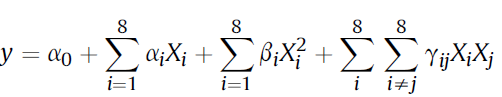

In [32]:
df1 = pd.concat([train_y ,train_x] ,axis=1, join='inner')
df1

,H2,LHV,η,λ,Pressure,ER,MC,Temperature
2228,13.480,144.5,96.31,1.6330,300.5,0.3223,0.1446,766.8
5910,17.630,125.1,94.05,5.6880,632.0,0.3591,0.2182,877.3
1950,12.800,146.4,96.26,1.3880,275.5,0.3195,0.1390,758.5
2119,13.220,145.2,96.29,1.5360,290.7,0.3212,0.1424,763.6
5947,17.640,124.9,94.00,5.7330,635.3,0.3595,0.2190,878.4
...,...,...,...,...,...,...,...,...
2895,14.890,140.3,96.29,2.2610,360.6,0.3290,0.1579,786.9
7813,17.730,117.5,91.63,7.8780,803.2,0.3781,0.2563,934.4
905,9.652,154.2,95.82,0.5689,181.5,0.3091,0.1181,727.2
5192,17.380,128.2,94.84,4.8270,567.3,0.3519,0.2039,855.8


In [33]:
df2 = pd.concat([test_y ,test_x] ,axis=1, join='inner')
df2

,H2,LHV,η,λ,Pressure,ER,MC,Temperature
9953,17.40,109.9,88.74,10.080,995.9,0.3995,0.2991,998.6
3850,16.32,134.8,95.95,3.263,446.5,0.3385,0.1770,815.5
4962,17.27,129.3,95.07,4.552,546.6,0.3496,0.1992,848.9
3886,16.37,134.7,95.93,3.303,449.8,0.3389,0.1777,816.6
5437,17.49,127.1,94.58,5.121,589.4,0.3544,0.2088,863.1
...,...,...,...,...,...,...,...,...
5273,17.42,127.9,94.76,4.924,574.6,0.3527,0.2055,858.2
8014,17.72,116.7,91.36,8.097,821.3,0.3801,0.2603,940.4
8984,17.59,113.2,90.06,9.116,908.6,0.3898,0.2797,969.5
6498,17.73,122.6,93.33,6.385,684.9,0.3650,0.2300,895.0


In [34]:
df1['Pressure**2'] = np.power(df1['Pressure'] , 2 )
df1['ER**2'] = np.power(df1['ER'] , 2 )
df1['MC**2'] = np.power(df1['MC'] , 2 )
df1['Temperature**2'] = np.power(df1['Temperature'] , 2 )
df1

,H2,LHV,η,λ,Pressure,ER,MC,Temperature,Pressure**2,ER**2,MC**2,Temperature**2
2228,13.480,144.5,96.31,1.6330,300.5,0.3223,0.1446,766.8,90300.25,0.103877,0.020909,587982.24
5910,17.630,125.1,94.05,5.6880,632.0,0.3591,0.2182,877.3,399424.00,0.128953,0.047611,769655.29
1950,12.800,146.4,96.26,1.3880,275.5,0.3195,0.1390,758.5,75900.25,0.102080,0.019321,575322.25
2119,13.220,145.2,96.29,1.5360,290.7,0.3212,0.1424,763.6,84506.49,0.103169,0.020278,583084.96
5947,17.640,124.9,94.00,5.7330,635.3,0.3595,0.2190,878.4,403606.09,0.129240,0.047961,771586.56
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,14.890,140.3,96.29,2.2610,360.6,0.3290,0.1579,786.9,130032.36,0.108241,0.024932,619211.61
7813,17.730,117.5,91.63,7.8780,803.2,0.3781,0.2563,934.4,645130.24,0.142960,0.065690,873103.36
905,9.652,154.2,95.82,0.5689,181.5,0.3091,0.1181,727.2,32942.25,0.095543,0.013948,528819.84
5192,17.380,128.2,94.84,4.8270,567.3,0.3519,0.2039,855.8,321829.29,0.123834,0.041575,732393.64


In [35]:
df2['Pressure**2'] = np.power(df2['Pressure'] , 2 )
df2['ER**2'] = np.power(df2['ER'] , 2 )
df2['MC**2'] = np.power(df2['MC'] , 2 )
df2['Temperature**2'] = np.power(df2['Temperature'] , 2 )
df2

,H2,LHV,η,λ,Pressure,ER,MC,Temperature,Pressure**2,ER**2,MC**2,Temperature**2
9953,17.40,109.9,88.74,10.080,995.9,0.3995,0.2991,998.6,991816.81,0.159600,0.089461,997201.96
3850,16.32,134.8,95.95,3.263,446.5,0.3385,0.1770,815.5,199362.25,0.114582,0.031329,665040.25
4962,17.27,129.3,95.07,4.552,546.6,0.3496,0.1992,848.9,298771.56,0.122220,0.039681,720631.21
3886,16.37,134.7,95.93,3.303,449.8,0.3389,0.1777,816.6,202320.04,0.114853,0.031577,666835.56
5437,17.49,127.1,94.58,5.121,589.4,0.3544,0.2088,863.1,347392.36,0.125599,0.043597,744941.61
...,...,...,...,...,...,...,...,...,...,...,...,...
5273,17.42,127.9,94.76,4.924,574.6,0.3527,0.2055,858.2,330165.16,0.124397,0.042230,736507.24
8014,17.72,116.7,91.36,8.097,821.3,0.3801,0.2603,940.4,674533.69,0.144476,0.067756,884352.16
8984,17.59,113.2,90.06,9.116,908.6,0.3898,0.2797,969.5,825553.96,0.151944,0.078232,939930.25
6498,17.73,122.6,93.33,6.385,684.9,0.3650,0.2300,895.0,469088.01,0.133225,0.052900,801025.00


In [36]:
reg_result_df1 = pd.DataFrame(columns = ['H2_p','LHV_p','η_p','λ_p'] , index = test_x.index )
reg_result_df1

,H2_p,LHV_p,η_p,λ_p
9953,NaN,NaN,NaN,NaN
3850,NaN,NaN,NaN,NaN
4962,NaN,NaN,NaN,NaN
3886,NaN,NaN,NaN,NaN
5437,NaN,NaN,NaN,NaN
...,...,...,...,...
5273,NaN,NaN,NaN,NaN
8014,NaN,NaN,NaN,NaN
8984,NaN,NaN,NaN,NaN
6498,NaN,NaN,NaN,NaN


In [37]:
model_reg1_1 = ols("H2 ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2) + I(Pressure*ER) +  I(Pressure*MC) + I(Pressure*Temperature) + I(ER*MC) + I(ER*Temperature)  + I(MC*Temperature)", data=df1)
results1_1 = model_reg1_1.fit()
results1_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     H2   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.789e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                -3919.6
No. Observations:                7000   AIC:                             7857.
Df Residuals:                    6991   BIC:                             7919.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  8.819e+06   2.44e+06      3.618      0.000    4.04e+06    1.36e+07
Pressure                   9231.1057   2554.770      3.613      0.000    4222.981    1.42e+04
ER                         2.023e+06   3.13e+06      0.647      0.518   -4.11e+06    8.15e+06
MC                         -1.88e+06   3.16e+06     -0.594      0.552   -8.08e+06    4.32e+06
Temperature               -2.711e+04   7040.498     -3.851      0.000   -4.09e+04   -1.33e+04
I(Pressure ** 2)              2.3993      0.696      3.450      0.001       1.036       3.763
I(ER ** 2)                 2.757e+05   6.22e+05      0.443      0.658   -9.44e+05     1.5e+06
I(MC ** 2)                -4.734e+05   2.14e+06     -0.221      0.825   -4.67e+06    3.72e+06
I(Temperature ** 2)          20.8363      5.219      3.992      0.000      10.606      31.067
I(Pressure * ER)           1163.1115   1679.391      0.693      0.489   -2129.004    4455.227
I(Pressure * MC)           -789.7863   1963.780     -0.402      0.688   -4639.392    3059.819
I(Pressure * Temperature)   -14.2575      3.827     -3.725      0.000     -21.760      -6.755
I(ER * MC)                -7.306e+05   1.77e+06     -0.412      0.680    -4.2e+06    2.74e+06
I(ER * Temperature)       -3187.3673   5114.053     -0.623      0.533   -1.32e+04    6837.727
I(MC * Temperature)        3244.4605   5412.607      0.599      0.549   -7365.891    1.39e+04
==============================================================================
Omnibus:                      315.340   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.497
Skew:                          -0.161   Prob(JB):                     7.68e-34
Kurtosis:                       2.352   Cond. No.                     8.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
reg_result_df1['H2_p'] = results1_1.predict(df2)
reg_result_df1

,H2_p,LHV_p,η_p,λ_p
9953,16.478803,NaN,NaN,NaN
3850,15.931785,NaN,NaN,NaN
4962,17.330762,NaN,NaN,NaN
3886,16.039114,NaN,NaN,NaN
5437,17.619535,NaN,NaN,NaN
...,...,...,...,...
5273,17.477637,NaN,NaN,NaN
8014,18.104238,NaN,NaN,NaN
8984,17.500138,NaN,NaN,NaN
6498,18.148441,NaN,NaN,NaN


In [39]:
model_reg1_2 = ols("LHV ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2) + I(Pressure*ER) +  I(Pressure*MC) + I(Pressure*Temperature) + I(ER*MC) + I(ER*Temperature)  + I(MC*Temperature)", data=df1)
results1_2 = model_reg1_2.fit()
results1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LHV   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.915e+05
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                -4085.6
No. Observations:                7000   AIC:                             8189.
Df Residuals:                    6991   BIC:                             8251.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -7.44e+06    2.5e+06     -2.980      0.003   -1.23e+07   -2.55e+06
Pressure                  -7541.6281   2616.105     -2.883      0.004   -1.27e+04   -2413.268
ER                        -2.099e+06    3.2e+06     -0.655      0.512   -8.38e+06    4.18e+06
MC                         1.771e+05   3.24e+06      0.055      0.956   -6.17e+06    6.53e+06
Temperature                2.321e+04   7209.526      3.219      0.001    9074.140    3.73e+04
I(Pressure ** 2)             -1.9110      0.712     -2.683      0.007      -3.307      -0.515
I(ER ** 2)                -5.074e+05   6.37e+05     -0.797      0.426   -1.76e+06    7.41e+05
I(MC ** 2)                -5.614e+04   2.19e+06     -0.026      0.980   -4.35e+06    4.24e+06
I(Temperature ** 2)         -18.1838      5.344     -3.403      0.001     -28.660      -7.708
I(Pressure * ER)          -1022.3514   1719.710     -0.594      0.552   -4393.504    2348.801
I(Pressure * MC)             96.8728   2010.927      0.048      0.962   -3845.154    4038.899
I(Pressure * Temperature)    11.7429      3.919      2.996      0.003       4.061      19.425
I(ER * MC)                 -3.28e+05   1.81e+06     -0.181      0.856   -3.88e+06    3.23e+06
I(ER * Temperature)        3625.9941   5236.831      0.692      0.489   -6639.782    1.39e+04
I(MC * Temperature)        -107.6839   5542.553     -0.019      0.984    -1.1e+04    1.08e+04
==============================================================================
Omnibus:                      155.442   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.034
Skew:                           0.263   Prob(JB):                     9.56e-29
Kurtosis:                       2.592   Cond. No.                     8.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
reg_result_df1['LHV_p'] = results1_2.predict(df2)
reg_result_df1

,H2_p,LHV_p,η_p,λ_p
9953,16.478803,110.779467,NaN,NaN
3850,15.931785,135.193141,NaN,NaN
4962,17.330762,129.193802,NaN,NaN
3886,16.039114,134.931304,NaN,NaN
5437,17.619535,126.964663,NaN,NaN
...,...,...,...,...
5273,17.477637,127.779962,NaN,NaN
8014,18.104238,116.374100,NaN,NaN
8984,17.500138,113.325604,NaN,NaN
6498,18.148441,122.207103,NaN,NaN


In [41]:
model_reg1_3 = ols("η ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2) + I(Pressure*ER) +  I(Pressure*MC) + I(Pressure*Temperature) + I(ER*MC) + I(ER*Temperature)  + I(MC*Temperature)", data=df1)
results1_3 = model_reg1_3.fit()
results1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      η   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.748e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                 131.94
No. Observations:                7000   AIC:                            -245.9
Df Residuals:                    6991   BIC:                            -184.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   6.05e+06   1.37e+06      4.428      0.000    3.37e+06    8.73e+06
Pressure                   6558.6070   1432.151      4.580      0.000    3751.157    9366.056
ER                         9.732e+05   1.75e+06      0.555      0.579   -2.46e+06    4.41e+06
MC                        -2.595e+06   1.77e+06     -1.464      0.143   -6.07e+06    8.81e+05
Temperature               -1.827e+04   3946.755     -4.629      0.000    -2.6e+04   -1.05e+04
I(Pressure ** 2)              1.7488      0.390      4.485      0.000       0.984       2.513
I(ER ** 2)                 -7.67e+04   3.49e+05     -0.220      0.826    -7.6e+05    6.07e+05
I(MC ** 2)                 -7.81e+05    1.2e+06     -0.651      0.515   -3.13e+06    1.57e+06
I(Temperature ** 2)          13.6962      2.926      4.682      0.000       7.961      19.431
I(Pressure * ER)            735.4668    941.431      0.781      0.435   -1110.024    2580.958
I(Pressure * MC)          -1057.0814   1100.854     -0.960      0.337   -3215.089    1100.926
I(Pressure * Temperature)   -10.0328      2.145     -4.676      0.000     -14.238      -5.827
I(ER * MC)                -1.385e+06   9.93e+05     -1.395      0.163   -3.33e+06    5.61e+05
I(ER * Temperature)       -1231.8210   2866.830     -0.430      0.667   -6851.678    4388.036
I(MC * Temperature)        4674.0217   3034.194      1.540      0.123   -1273.918    1.06e+04
==============================================================================
Omnibus:                      856.619   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.898
Skew:                           0.017   Prob(JB):                     1.46e-49
Kurtosis:                       2.123   Cond. No.                     8.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
reg_result_df1['η_p'] = results1_3.predict(df2)
reg_result_df1

,H2_p,LHV_p,η_p,λ_p
9953,16.478803,110.779467,88.184172,NaN
3850,15.931785,135.193141,95.691133,NaN
4962,17.330762,129.193802,95.069723,NaN
3886,16.039114,134.931304,95.704626,NaN
5437,17.619535,126.964663,94.623274,NaN
...,...,...,...,...
5273,17.477637,127.779962,94.758895,NaN
8014,18.104238,116.374100,91.608438,NaN
8984,17.500138,113.325604,90.016664,NaN
6498,18.148441,122.207103,93.577011,NaN


In [43]:
model_reg1_4 = ols("λ ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2) + I(Pressure*ER) +  I(Pressure*MC) + I(Pressure*Temperature) + I(ER*MC) + I(ER*Temperature)  + I(MC*Temperature)", data=df1)
results1_4 = model_reg1_4.fit()
results1_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      λ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.853e+05
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                 4262.4
No. Observations:                7000   AIC:                            -8507.
Df Residuals:                    6991   BIC:                            -8445.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -2.584e+06   7.57e+05     -3.412      0.001   -4.07e+06    -1.1e+06
Pressure                  -2694.8517    793.823     -3.395      0.001   -4250.985   -1138.719
ER                        -6.221e+05   9.72e+05     -0.640      0.522   -2.53e+06    1.28e+06
MC                          4.92e+05   9.83e+05      0.501      0.617   -1.43e+06    2.42e+06
Temperature                7963.9714   2187.635      3.640      0.000    3675.542    1.23e+04
I(Pressure ** 2)             -0.6988      0.216     -3.233      0.001      -1.122      -0.275
I(ER ** 2)                -9.517e+04   1.93e+05     -0.492      0.623   -4.74e+05    2.84e+05
I(MC ** 2)                 1.108e+05   6.65e+05      0.167      0.868   -1.19e+06    1.41e+06
I(Temperature ** 2)          -6.1396      1.622     -3.786      0.000      -9.319      -2.961
I(Pressure * ER)           -348.8261    521.823     -0.668      0.504   -1371.758     674.106
I(Pressure * MC)            210.8158    610.189      0.345      0.730    -985.340    1406.972
I(Pressure * Temperature)     4.1686      1.189      3.505      0.000       1.837       6.500
I(ER * MC)                 1.722e+05    5.5e+05      0.313      0.754   -9.07e+05    1.25e+06
I(ER * Temperature)         995.5267   1589.047      0.626      0.531   -2119.487    4110.541
I(MC * Temperature)        -837.6957   1681.814     -0.498      0.618   -4134.562    2459.171
==============================================================================
Omnibus:                      346.829   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.459
Skew:                           0.207   Prob(JB):                     7.93e-39
Kurtosis:                       2.344   Cond. No.                     8.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
reg_result_df1['λ_p'] = results1_4.predict(df2)
reg_result_df1

,H2_p,LHV_p,η_p,λ_p
9953,16.478803,110.779467,88.184172,10.349570
3850,15.931785,135.193141,95.691133,3.388370
4962,17.330762,129.193802,95.069723,4.528555
3886,16.039114,134.931304,95.704626,3.408624
5437,17.619535,126.964663,94.623274,5.077026
...,...,...,...,...
5273,17.477637,127.779962,94.758895,4.902947
8014,18.104238,116.374100,91.608438,7.980947
8984,17.500138,113.325604,90.016664,9.147322
6498,18.148441,122.207103,93.577011,6.250502


In [45]:
metric_df.at['RMSE','Reg1'] = rmse(np.array(test_y),np.array(reg_result_df1) )
metric_df.at['MAE','Reg1'] = mae(np.array(test_y),np.array(reg_result_df1) )
metric_df.at['MAPE','Reg1'] = mape(np.array(test_y),np.array(reg_result_df1) )
metric_df

,MLP,MLP_Tuned,MLP_Tuned2,MLP_Tuned3,MLP_Tuned4,Reg1
RMSE,6.331031,0.635892,0.634360,0.630952,0.190282,0.664816
MAE,0.10855,0.000898,0.001044,0.008137,0.003367,0.000907
MAPE,1.552378,0.115406,0.098520,0.136965,0.057739,0.148712


In [46]:
reg_result_df2 = pd.DataFrame(columns = ['H2_p','LHV_p','η_p','λ_p'] , index = test_x.index )
reg_result_df2

,H2_p,LHV_p,η_p,λ_p
9953,NaN,NaN,NaN,NaN
3850,NaN,NaN,NaN,NaN
4962,NaN,NaN,NaN,NaN
3886,NaN,NaN,NaN,NaN
5437,NaN,NaN,NaN,NaN
...,...,...,...,...
5273,NaN,NaN,NaN,NaN
8014,NaN,NaN,NaN,NaN
8984,NaN,NaN,NaN,NaN
6498,NaN,NaN,NaN,NaN


In [47]:
model_reg2_1 = ols("H2 ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2)", data=df1)
results2_1 = model_reg2_1.fit()
results2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     H2   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.778e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:29   Log-Likelihood:                -3927.6
No. Observations:                7000   AIC:                             7873.
Df Residuals:                    6991   BIC:                             7935.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1288.1793    775.328      1.661      0.097    -231.699    2808.058
Pressure                0.8090      0.191      4.233      0.000       0.434       1.184
ER                   2189.3484   2237.051      0.979      0.328   -2195.951    6574.648
MC                  -1975.4634    660.996     -2.989      0.003   -3271.216    -679.711
Temperature            -3.3177      1.927     -1.722      0.085      -7.095       0.460
I(Pressure ** 2)       -0.0002      0.000     -1.284      0.199      -0.001       0.000
I(ER ** 2)          -3345.3215   3180.464     -1.052      0.293   -9579.997    2889.354
I(MC ** 2)            716.6517   1591.805      0.450      0.653   -2403.768    3837.072
I(Temperature ** 2)     0.0016      0.001      1.451      0.147      -0.001       0.004
==============================================================================
Omnibus:                      310.617   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.884
Skew:                          -0.156   Prob(JB):                     2.84e-33
Kurtosis:                       2.355   Cond. No.                     6.63e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
reg_result_df2['H2_p'] = results2_1.predict(df2)
reg_result_df2

,H2_p,LHV_p,η_p,λ_p
9953,16.469855,NaN,NaN,NaN
3850,15.945577,NaN,NaN,NaN
4962,17.330564,NaN,NaN,NaN
3886,16.052761,NaN,NaN,NaN
5437,17.608305,NaN,NaN,NaN
...,...,...,...,...
5273,17.492809,NaN,NaN,NaN
8014,18.096063,NaN,NaN,NaN
8984,17.491519,NaN,NaN,NaN
6498,18.146241,NaN,NaN,NaN


In [49]:
model_reg2_2 = ols("LHV ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2)", data=df1)
results2_2 = model_reg2_2.fit()
results2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LHV   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.898e+05
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                -4091.7
No. Observations:                7000   AIC:                             8201.
Df Residuals:                    6991   BIC:                             8263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1372.4573    793.725     -1.729      0.084   -2928.398     183.483
Pressure               -0.9382      0.196     -4.795      0.000      -1.322      -0.555
ER                  -2771.1329   2290.130     -1.210      0.226   -7260.482    1718.217
MC                   2148.7516    676.679      3.175      0.002     822.255    3475.248
Temperature             4.1503      1.973      2.104      0.035       0.283       8.018
I(Pressure ** 2)        0.0003      0.000      1.714      0.087   -3.97e-05       0.001
I(ER ** 2)           4122.4622   3255.927      1.266      0.206   -2260.143    1.05e+04
I(MC ** 2)          -1261.1868   1629.574     -0.774      0.439   -4455.645    1933.272
I(Temperature ** 2)    -0.0021      0.001     -1.818      0.069      -0.004       0.000
==============================================================================
Omnibus:                      153.177   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.939
Skew:                           0.260   Prob(JB):                     2.73e-28
Kurtosis:                       2.594   Cond. No.                     6.63e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
reg_result_df2['LHV_p'] = results2_2.predict(df2)
reg_result_df2

,H2_p,LHV_p,η_p,λ_p
9953,16.469855,110.786086,NaN,NaN
3850,15.945577,135.181093,NaN,NaN
4962,17.330564,129.200565,NaN,NaN
3886,16.052761,134.919318,NaN,NaN
5437,17.608305,126.981298,NaN,NaN
...,...,...,...,...
5273,17.492809,127.766574,NaN,NaN
8014,18.096063,116.380830,NaN,NaN
8984,17.491519,113.332383,NaN,NaN
6498,18.146241,122.207262,NaN,NaN


In [51]:
model_reg2_3 = ols("η ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2)", data=df1)
results2_3 = model_reg2_3.fit()
results2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      η   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.720e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                 120.70
No. Observations:                7000   AIC:                            -223.4
Df Residuals:                    6991   BIC:                            -161.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             629.8802    434.833      1.449      0.148    -222.525    1482.285
Pressure                0.3873      0.107      3.613      0.000       0.177       0.597
ER                    842.0151   1254.622      0.671      0.502   -1617.425    3301.455
MC                   -988.1196    370.711     -2.665      0.008   -1714.826    -261.413
Temperature            -1.2683      1.081     -1.173      0.241      -3.387       0.850
I(Pressure ** 2)     -6.39e-05   8.83e-05     -0.724      0.469      -0.000       0.000
I(ER ** 2)          -1361.5700   1783.723     -0.763      0.445   -4858.209    2135.069
I(MC ** 2)             10.5003    892.744      0.012      0.991   -1739.548    1760.549
I(Temperature ** 2)     0.0006      0.001      0.922      0.357      -0.001       0.002
==============================================================================
Omnibus:                      834.756   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.460
Skew:                           0.024   Prob(JB):                     4.94e-49
Kurtosis:                       2.128   Cond. No.                     6.63e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
reg_result_df2['η_p'] = results2_3.predict(df2)
reg_result_df2

,H2_p,LHV_p,η_p,λ_p
9953,16.469855,110.786086,88.177094,NaN
3850,15.945577,135.181093,95.700171,NaN
4962,17.330564,129.200565,95.075847,NaN
3886,16.052761,134.919318,95.713543,NaN
5437,17.608305,126.981298,94.622379,NaN
...,...,...,...,...
5273,17.492809,127.766574,94.768749,NaN
8014,18.096063,116.380830,91.602587,NaN
8984,17.491519,113.332383,90.010213,NaN
6498,18.146241,122.207262,93.573882,NaN


In [53]:
model_reg2_4 = ols("λ ~ Pressure + ER + MC + Temperature +I(Pressure**2) + I(ER**2) + I(MC**2) + I(Temperature**2)", data=df1)
results2_4 = model_reg2_4.fit()
results2_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      λ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.843e+05
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:                 4255.2
No. Observations:                7000   AIC:                            -8492.
Df Residuals:                    6991   BIC:                            -8431.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -392.9685    240.884     -1.631      0.103    -865.175      79.238
Pressure               -0.2309      0.059     -3.889      0.000      -0.347      -0.115
ER                   -677.6453    695.023     -0.975      0.330   -2040.101     684.810
MC                    633.3416    205.363      3.084      0.002     230.768    1035.915
Temperature             1.0099      0.599      1.687      0.092      -0.164       2.184
I(Pressure ** 2)     5.631e-05   4.89e-05      1.151      0.250   -3.96e-05       0.000
I(ER ** 2)           1043.3734    988.129      1.056      0.291    -893.659    2980.406
I(MC ** 2)           -236.5235    494.553     -0.478      0.632   -1205.997     732.950
I(Temperature ** 2)    -0.0005      0.000     -1.425      0.154      -0.001       0.000
==============================================================================
Omnibus:                      342.647   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.723
Skew:                           0.202   Prob(JB):                     3.12e-38
Kurtosis:                       2.345   Cond. No.                     6.63e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
reg_result_df2['λ_p'] = results2_4.predict(df2)
reg_result_df2

,H2_p,LHV_p,η_p,λ_p
9953,16.469855,110.786086,88.177094,10.352132
3850,15.945577,135.181093,95.700171,3.384301
4962,17.330564,129.200565,95.075847,4.528927
3886,16.052761,134.919318,95.713543,3.404604
5437,17.608305,126.981298,94.622379,5.080661
...,...,...,...,...
5273,17.492809,127.766574,94.768749,4.898475
8014,18.096063,116.380830,91.602587,7.983313
8984,17.491519,113.332383,90.010213,9.149805
6498,18.146241,122.207262,93.573882,6.251062


In [55]:
metric_df.at['RMSE','Reg2'] = rmse(np.array(test_y),np.array(reg_result_df2) )
metric_df.at['MAE','Reg2'] = mae(np.array(test_y),np.array(reg_result_df2) )
metric_df.at['MAPE','Reg2'] = mape(np.array(test_y),np.array(reg_result_df2) )
metric_df

,MLP,MLP_Tuned,MLP_Tuned2,MLP_Tuned3,MLP_Tuned4,Reg1,Reg2
RMSE,6.331031,0.635892,0.634360,0.630952,0.190282,0.664816,0.665059
MAE,0.10855,0.000898,0.001044,0.008137,0.003367,0.000907,0.000913
MAPE,1.552378,0.115406,0.098520,0.136965,0.057739,0.148712,0.148589
